In [57]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model

In [58]:
#Instantiating our Pre_trained Model
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')
for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed9')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
#pre_trained_model.summary()

last layer output shape:  (None, 3, 3, 2048)


last layer output shape:  (None, 3, 3, 2048)


In [59]:

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [60]:
Base_dir = '/Users/safoprince/Documents/Projects/horse-or-human/'
train_dir = os.path.join(Base_dir,'train')
validation_dir = os.path.join(Base_dir,'validation')
# Directory with our training horse pictures
train_horse_dir = os.path.join(Base_dir,'train/horses')

# Directory with our training human pictures
train_human_dir = os.path.join(Base_dir,'train/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join(Base_dir,'validation/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join(Base_dir,'validation/humans')



In [61]:
#Creating Instance of ImageGenerator
train_datagen = ImageDataGenerator( 
     rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

In [62]:
train_generator = train_datagen.flow_from_directory(train_dir,batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                             class_mode = 'binary', 
                                                            target_size = (150, 150)) 

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [81]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/10
8/8 [==============================] - 14s 2s/step - loss: 0.0247 - accuracy: 0.9875 - val_loss: 6.4738e-04 - val_accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 13s 2s/step - loss: 3.3134e-05 - accuracy: 1.0000 - val_loss: 5.4659e-04 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 14s 2s/step - loss: 4.6019e-05 - accuracy: 1.0000 - val_loss: 3.0144e-04 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 17s 2s/step - loss: 2.6694e-04 - accuracy: 1.0000 - val_loss: 2.5987e-04 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 17s 2s/step - loss: 0.0139 - accuracy: 0.9937 - val_loss: 5.9804e-04 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 21s 3s/step - loss: 6.3635e-05 - accuracy: 1.0000 - val_loss: 2.9478e-04 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 13s 2s/step - loss: 2.4809e-04 - accuracy: 1.0000 - val_loss: 3.4696e-04 - val_acc

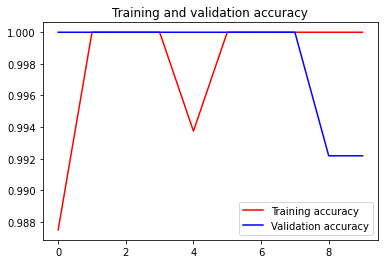

<Figure size 432x288 with 0 Axes>

In [112]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [117]:
import numpy as np
from keras.preprocessing import image
import os
main_dir = '/Users/safoprince/Documents/Projects/image/'
images = os.listdir(main_dir)

for i in images:
    print()
#  # predicting images
path = main_dir + i
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes[0])
if classes[0]>0.5:
    print(i + " is a human")
else:
    print(i + " is a horse")




[1.]
human.jpg is a human
